In [3]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('Data_Negara_HELP.csv')
df['mean'] = df.mean(axis=1)

df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
mean                0
dtype: int64

In [41]:
df['mean'].describe()

count      167.000000
mean      3369.246082
std       4067.913907
min        136.064444
25%        605.081667
50%       1682.570000
75%       4065.750000
max      21901.568889
Name: mean, dtype: float64

In [4]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [5]:
print(finding_outlier(df['mean']))
print(finding_outlier(df['Pendapatan']))

7      10382.146667
8      10033.023667
15      9527.782222
23     12900.486667
29      9806.977778
44     11354.910000
53      9574.474556
73     10520.235556
82     12655.793333
91     21901.568889
110    10670.593111
114    16696.642222
123    21720.606667
133    13240.507111
144    10576.000111
145    14479.704111
157    10316.047778
159    10881.694444
Name: mean, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64


In [6]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

In [7]:
df2 = remove_outlier(df[['mean', 'Pendapatan']])

df2.dropna(axis=0, inplace=True)
df2

,mean,Pendapatan
0,265.237778,1610.0
1,1578.021111,9930.0
2,1950.751111,12900.0
3,1082.856667,5900.0
4,3500.122222,19100.0
...,...,...
162,680.318889,2950.0
163,3354.653333,16500.0
164,674.387778,4490.0
165,667.961111,4480.0


In [8]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)

In [9]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [10]:
new_df = pd.DataFrame(data=df_std, columns=['mean', 'Pendapatan'])
new_df['label1_kmeans'] = labels1
new_df

,mean,Pendapatan,label1_kmeans
0,-0.874412,-0.951609,0
1,-0.296391,-0.200009,0
2,-0.132277,0.068290,0
3,-0.514413,-0.564065,0
4,0.549915,0.628377,1
...,...,...,...
144,-0.691651,-0.830558,0
145,0.485864,0.393502,0
146,-0.694262,-0.691440,0
147,-0.697092,-0.692343,0


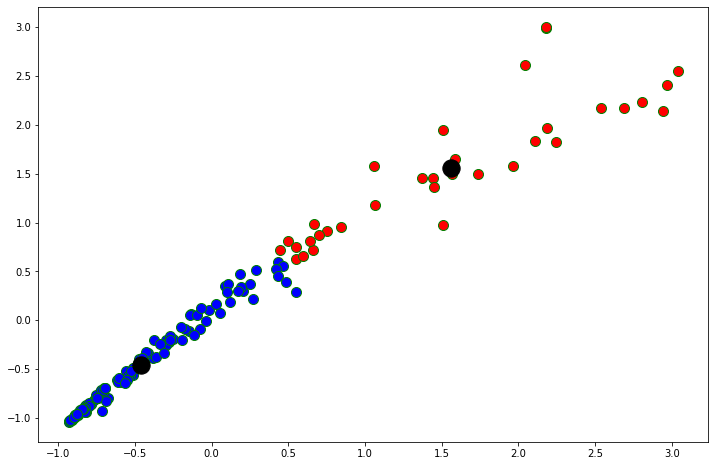

In [11]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['mean'][new_df.label1_kmeans==0], new_df['Pendapatan'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['mean'][new_df.label1_kmeans==1], new_df['Pendapatan'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

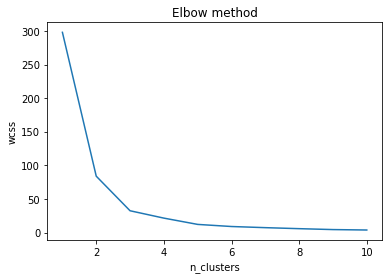

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()


In [13]:
kmeans2 = KMeans(n_clusters = 5, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_


In [14]:
new_df['label2_kmeans'] = labels2
new_df

,mean,Pendapatan,label1_kmeans,label2_kmeans
0,-0.874412,-0.951609,0,2
1,-0.296391,-0.200009,0,0
2,-0.132277,0.068290,0,0
3,-0.514413,-0.564065,0,2
4,0.549915,0.628377,1,3
...,...,...,...,...
144,-0.691651,-0.830558,0,2
145,0.485864,0.393502,0,3
146,-0.694262,-0.691440,0,2
147,-0.697092,-0.692343,0,2


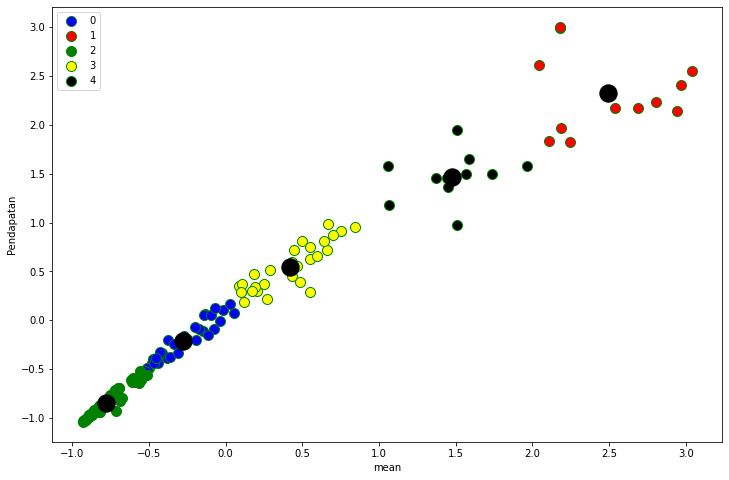

In [23]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['mean'][new_df.label2_kmeans==0], new_df['Pendapatan'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['mean'][new_df.label2_kmeans==1], new_df['Pendapatan'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['mean'][new_df.label2_kmeans==2], new_df['Pendapatan'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['mean'][new_df.label2_kmeans==3], new_df['Pendapatan'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')
plt.scatter(new_df['mean'][new_df.label2_kmeans==4], new_df['Pendapatan'][new_df.label2_kmeans==4], label ='4', c='black', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.xlabel('mean')
plt.ylabel('Pendapatan')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.6660330852530221
0.5948958944049394


In [25]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [26]:
kmeansb = KMeans(n_clusters = 5, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([2, 0, 0, 2, 3, 3, 0, 3, 4, 1, 2, 3, 3, 0, 2, 2, 2, 0, 0, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2, 0, 2, 3, 1, 4, 0, 0, 0, 0, 4,
       2, 3, 0, 1, 3, 2, 0, 1, 2, 4, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 3, 0,
       4, 1, 0, 1, 0, 3, 2, 2, 2, 2, 3, 3, 2, 2, 4, 3, 0, 2, 2, 3, 0, 2,
       4, 2, 3, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 3, 0, 0, 2, 3,
       4, 3, 3, 2, 2, 1, 2, 0, 3, 2, 4, 4, 2, 0, 4, 1, 0, 0, 2, 3, 2, 2,
       0, 2, 2, 2, 0, 3, 0, 2, 0, 1, 3, 2, 2, 3, 2, 2, 2])

In [27]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['mean', 'Pendapatan'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,mean,Pendapatan,label1_kmeans,label2_kmeans
0,265.237778,1610.0,1,2
1,1578.021111,9930.0,1,0
2,1950.751111,12900.0,1,0
3,1082.856667,5900.0,1,2
4,3500.122222,19100.0,0,3
...,...,...,...,...
144,680.318889,2950.0,1,2
145,3354.653333,16500.0,1,3
146,674.387778,4490.0,1,2
147,667.961111,4480.0,1,2


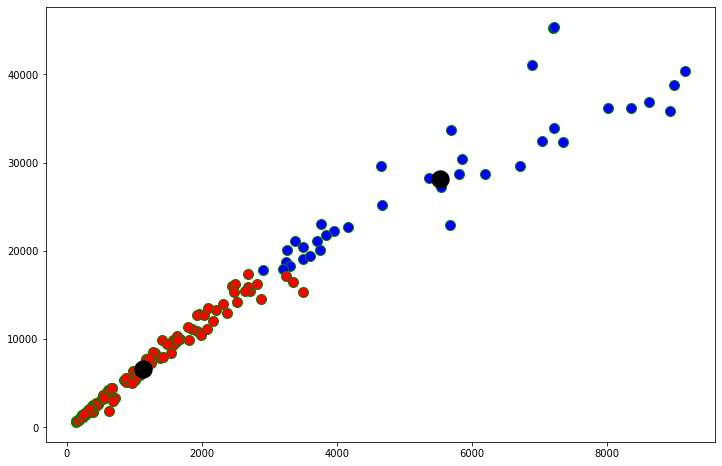

In [28]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['mean'][new_df1.label1_kmeans == 0], new_df1['Pendapatan'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['mean'][new_df1.label1_kmeans == 1], new_df1['Pendapatan'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

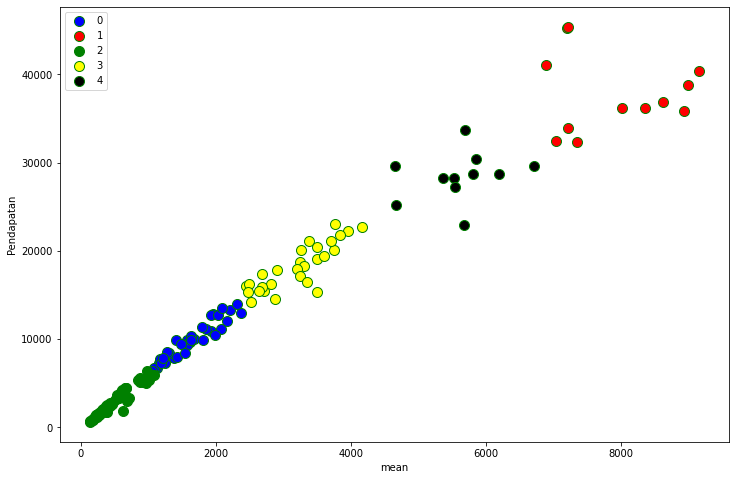

In [30]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['mean'][new_df1.label2_kmeans == 0], new_df1['Pendapatan'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['mean'][new_df1.label2_kmeans == 1], new_df1['Pendapatan'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['mean'][new_df1.label2_kmeans == 2], new_df1['Pendapatan'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['mean'][new_df1.label2_kmeans == 3], new_df1['Pendapatan'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')
plt.scatter(new_df1['mean'][new_df1.label2_kmeans == 4], new_df1['Pendapatan'][new_df1.label2_kmeans == 4], c='black', label = '4', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.xlabel('mean')
plt.ylabel('Pendapatan')
plt.show()

In [33]:
df3 = pd.merge(df,new_df1, how='outer')

df3['label2_kmeans'] = df3['label2_kmeans'].astype('object')
df3

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,mean,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,265.237778,NaN,NaN
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1578.021111,NaN,NaN
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1950.751111,1.0,0.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1082.856667,NaN,NaN
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,3500.122222,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,NaN,NaN,NaN,NaN,NaN,4240.0,NaN,NaN,NaN,NaN,645.550000,1.0,2.0
219,NaN,NaN,NaN,NaN,NaN,2950.0,NaN,NaN,NaN,NaN,680.318889,1.0,2.0
220,NaN,NaN,NaN,NaN,NaN,4490.0,NaN,NaN,NaN,NaN,674.387778,1.0,2.0
221,NaN,NaN,NaN,NaN,NaN,4480.0,NaN,NaN,NaN,NaN,667.961111,1.0,2.0


In [34]:
top_tip = df3[df3['label2_kmeans']==2]
top_tip.dropna(inplace=True)

In [35]:
top_tip

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,mean,label1_kmeans,label2_kmeans
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.780,71.6,3.20,1980.0,844.502222,1.0,2.0
30,Cape Verde,26.5,32.700,4.09,61.8000,5830.0,0.505,72.5,2.67,3310.0,1037.862778,1.0,2.0
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190.0,20.700,60.4,4.95,2740.0,913.578889,1.0,2.0
40,Cote d'Ivoire,111.0,50.600,5.30,43.3000,2690.0,5.390,56.3,5.27,1220.0,465.240000,1.0,2.0
50,Eritrea,55.2,4.790,2.66,23.3000,1420.0,11.600,61.7,4.61,482.0,229.540000,1.0,2.0
59,Ghana,74.7,29.500,5.22,45.9000,3060.0,16.600,62.2,4.27,1310.0,512.043333,1.0,2.0
69,India,58.8,22.600,4.05,27.1000,4410.0,8.980,66.2,2.60,1350.0,661.147778,1.0,2.0
83,Kyrgyz Republic,29.6,51.600,6.18,81.7000,2790.0,10.000,68.5,3.10,880.0,435.631111,1.0,2.0
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340.0,3.800,65.4,3.46,2860.0,714.595556,1.0,2.0
102,Moldova,17.2,39.200,11.70,78.5000,3910.0,11.100,69.7,1.27,1630.0,640.963333,1.0,2.0


In [36]:
top_tip.sort_values(by=['mean'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,mean,label1_kmeans,label2_kmeans
150,Togo,90.3,40.200,7.65,57.3000,1210.0,1.18,58.7,4.87,488.0,217.577778,1.0,2.0
50,Eritrea,55.2,4.790,2.66,23.3000,1420.0,11.60,61.7,4.61,482.0,229.540000,1.0,2.0
155,Uganda,81.0,17.100,9.01,28.6000,1540.0,10.60,56.8,6.15,595.0,260.473333,1.0,2.0
136,Solomon Islands,28.1,49.300,8.55,81.2000,1780.0,6.81,61.7,4.24,1290.0,367.766667,1.0,2.0
83,Kyrgyz Republic,29.6,51.600,6.18,81.7000,2790.0,10.00,68.5,3.10,880.0,435.631111,1.0,2.0
40,Cote d'Ivoire,111.0,50.600,5.30,43.3000,2690.0,5.39,56.3,5.27,1220.0,465.240000,1.0,2.0
59,Ghana,74.7,29.500,5.22,45.9000,3060.0,16.60,62.2,4.27,1310.0,512.043333,1.0,2.0
107,Myanmar,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0,538.977211,1.0,2.0
116,Pakistan,92.1,13.500,2.20,19.4000,4280.0,10.90,65.3,3.85,1040.0,614.138889,1.0,2.0
102,Moldova,17.2,39.200,11.70,78.5000,3910.0,11.10,69.7,1.27,1630.0,640.963333,1.0,2.0


In [37]:
#summary

df['K_means_labels'] = pd.Series(labelsb).astype('object')

In [38]:
top_tip = df[df['K_means_labels']==2]

In [39]:
top_tip

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,mean,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,265.237778,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1082.856667,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,5675.073000,2
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,2493.777778,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,9527.782222,2
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Suriname,24.1,52.5,7.01,38.4,14200,7.200,70.3,2.52,8300,2522.447778,2
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,10576.000111,2
146,Tajikistan,52.4,14.9,5.98,58.6,2110,12.500,69.6,3.51,738,340.610000,2
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702,332.410000,2


In [43]:
df_mean = top_tip.sort_values(by=['mean'],ascending=True)[:10]

In [44]:
df_mean

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,mean,K_means_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,136.064444,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,175.555556,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,249.680000,2
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,265.237778,2
56,Gambia,80.3,23.80,5.69,42.7,1660,4.30,65.5,5.71,562,272.222222,2
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708,316.477778,2
147,Tanzania,71.9,18.70,6.01,29.1,2090,9.25,59.3,5.43,702,332.410000,2
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.50,69.6,3.51,738,340.610000,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,347.923333,2
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,393.531111,2


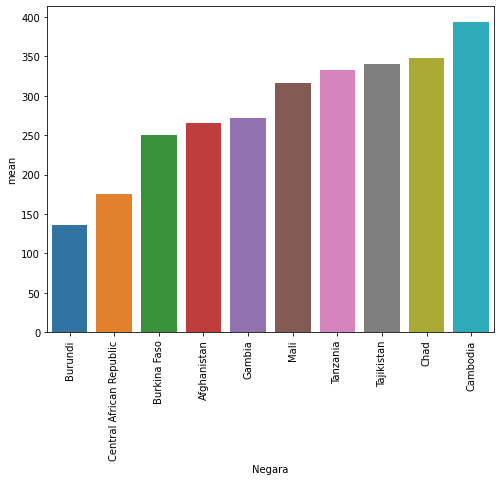

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x="Negara", y="mean", data=df_mean);
ax.set_xticklabels(df_mean['Negara'], rotation=90)
plt.show()